<a href="https://colab.research.google.com/github/suhasipm/Customer-segmentation/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING**

**1. Importing dataset file from drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls 'drive/My Drive/Mall_Customers.csv'

'drive/My Drive/Mall_Customers.csv'


**2. Importing libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**3. Importing data from .csv file where the dataset is stored in Pandas Dataframe**

In [6]:
df = pd.read_csv('drive/My Drive/Mall_Customers.csv')

**4. Viewing the data**

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.info()
#information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.head()
#first 5 rows of data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.columns
#column names of dataset

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
# CustomerID has no value so deleting using drop()
df.drop(["CustomerID"], axis = 1, inplace=True)

**5. Data Visualization**

*Age Distribution*

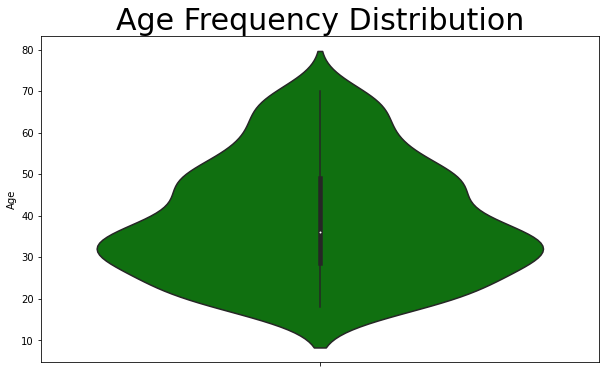

In [12]:
#customer age frequency using violin plot
plt.figure(figsize=(10,6))
plt.title("Age Frequency Distribution", fontSize=30)
sns.axes_style("dark")
sns.violinplot(y=df["Age"], color='green')
plt.show()

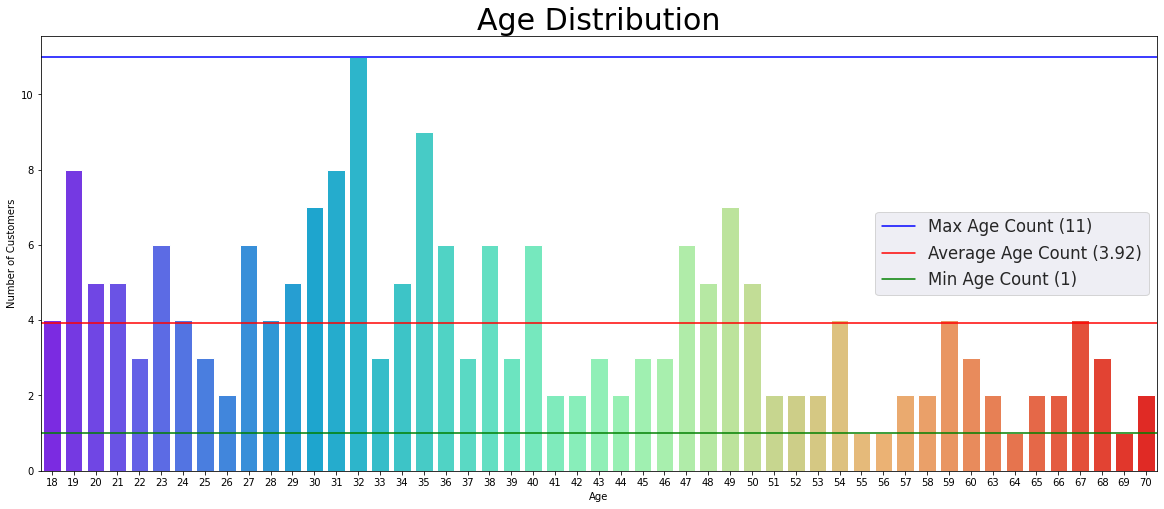

In [13]:
#distribution of number of customers in each age group represented in bar graph 
fig, gr = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
gr = sns.countplot(x=df['Age'], palette='rainbow')
gr.axhline(y=df['Age'].value_counts().max(), linestyle='-',color='blue', label=f'Max Age Count ({df.Age.value_counts().max()})')
gr.axhline(y=df['Age'].value_counts().mean(), linestyle='-',color='red', label=f'Average Age Count ({df.Age.value_counts().mean():.2f})')
gr.axhline(y=df['Age'].value_counts().min(), linestyle='-',color='green', label=f'Min Age Count ({df.Age.value_counts().min()})')
gr.legend()
gr.set_ylabel('Number of Customers')
plt.title('Age Distribution', fontsize = 30)
plt.show()

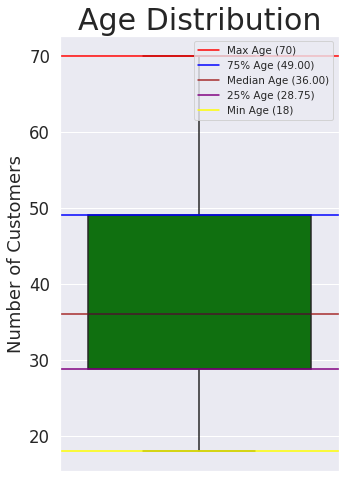

In [14]:
#box plot of age distribution
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
age = sns.boxplot(y=df["Age"], color="green")
age.axhline(y=df['Age'].max(), linestyle='-',color='red', label=f'Max Age ({df.Age.max()})')
age.axhline(y=df['Age'].describe()[6], linestyle='-',color='blue', label=f'75% Age ({df.Age.describe()[6]:.2f})')
age.axhline(y=df['Age'].median(), linestyle='-',color='brown', label=f'Median Age ({df.Age.median():.2f})')
age.axhline(y=df['Age'].describe()[4], linestyle='-',color='purple', label=f'25% Age ({df.Age.describe()[4]:.2f})')
age.axhline(y=df['Age'].min(), linestyle='-',color='yellow', label=f'Min Age ({df.Age.min()})')
age.legend(fontsize='xx-small', loc='upper right')
age.set_ylabel('Number of Customers')

plt.title('Age Distribution', fontsize = 30)
plt.show()

*Gender Distribution*

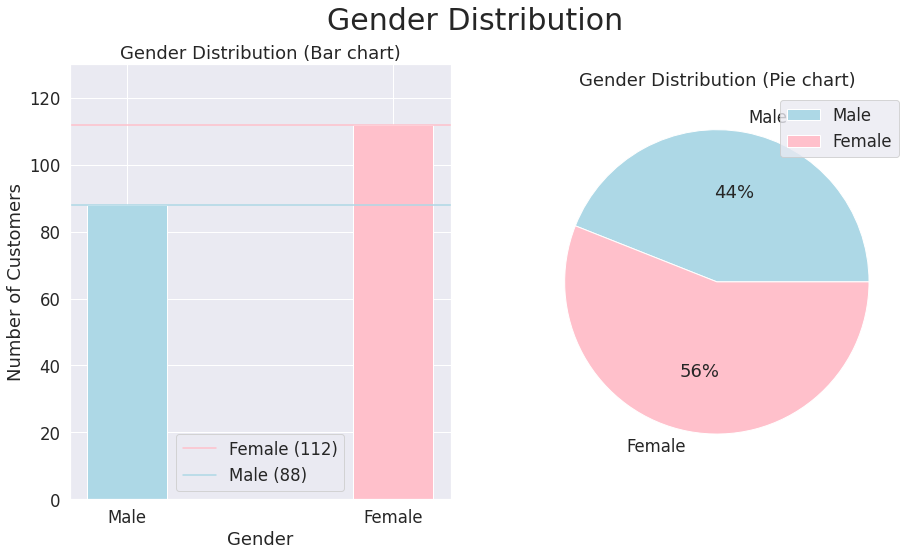

In [15]:
#gender distribution of customers in bar and pie chart
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)
fig, (gr1,gr2) = plt.subplots(ncols=2,figsize=(15,8))
bar = gr1.bar(x=labels, height=values, width=0.3, align='center', color=["lightblue", "pink"])
gr1.set(title='Gender Distribution (Bar chart)',xlabel='Gender', ylabel='Number of Customers')
gr1.set_ylim(0,130)
gr1.axhline(y=df['Gender'].value_counts()[0], color='pink', linestyle='-', label=f'Female ({df.Gender.value_counts()[0]})')
gr1.axhline(y=df['Gender'].value_counts()[1], color='lightblue', linestyle='-', label=f'Male ({df.Gender.value_counts()[1]})')
gr1.legend()

gr2.pie(values,labels=labels,colors=['lightblue','pink'],autopct='%1.0f%%')
gr2.set(title='Gender Distribution (Pie chart)')
gr2.legend()
fig.suptitle('Gender Distribution', fontsize=30)
plt.show()

*Gender wise Age Distribution*

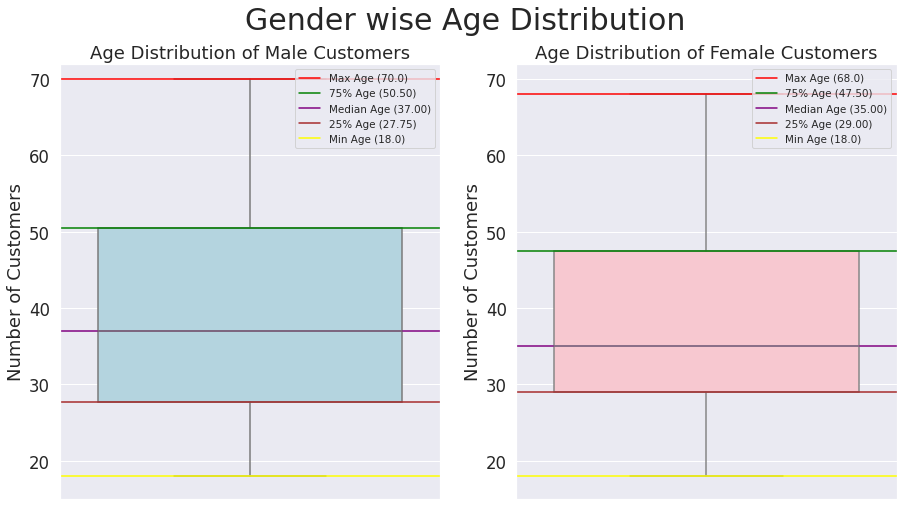

In [16]:
#box plot of gender wise age distribution
df_male = df[df['Gender']=='Male']['Age'].describe()
df_female = df[df['Gender']=='Female']['Age'].describe()

fig, (m,f) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="lightblue", ax=m)
m.axhline(y=df['Age'].max(), linestyle='-',color='red', label=f'Max Age ({df_male[7]})')
m.axhline(y=df_male[6], linestyle='-',color='green', label=f'75% Age ({df_male[6]:.2f})')
m.axhline(y=df_male[5], linestyle='-',color='purple', label=f'Median Age ({df_male[5]:.2f})')
m.axhline(y=df_male[4], linestyle='-',color='brown', label=f'25% Age ({df_male[4]:.2f})')
m.axhline(y=df_male[3], linestyle='-',color='yellow', label=f'Min Age ({df_male[3]})')
m.legend(fontsize='xx-small', loc='upper right')
m.set(ylabel='Number of Customers', title='Age Distribution of Male Customers')
m.set_ylim(15,72)

f = sns.boxplot(y=df[df['Gender']=='Female']['Age'], color="pink", ax=f)
f.axhline(y=df_female[7], linestyle='-',color='red', label=f'Max Age ({df_female[7]})')
f.axhline(y=df_female[6], linestyle='-',color='green', label=f'75% Age ({df_female[6]:.2f})')
f.axhline(y=df_female[5], linestyle='-',color='purple', label=f'Median Age ({df_female[5]:.2f})')
f.axhline(y=df_female[4], linestyle='-',color='brown', label=f'25% Age ({df_female[4]:.2f})')
f.axhline(y=df_female[3], linestyle='-',color='yellow', label=f'Min Age ({df_female[3]})')
f.legend(fontsize='xx-small', loc ='upper right')
f.set(ylabel='Number of Customers', title='Age Distribution of Female Customers')
f.set_ylim(15,72)
fig.suptitle('Gender wise Age Distribution', fontsize=30)
plt.show()

In [17]:
#average age of male customers
df[df['Gender']=='Male'].Age.mean()

39.80681818181818

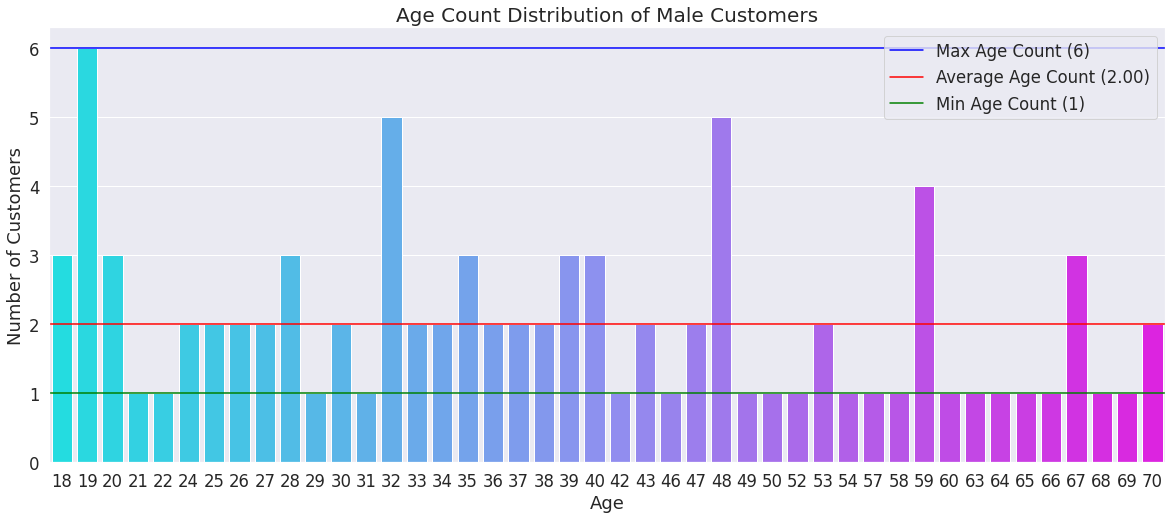

In [19]:
#age count distribution of male customers
maximum = df[df['Gender']=='Male'].Age.value_counts().max()
mean = df[df['Gender']=='Male'].Age.value_counts().mean()
minimum = df[df['Gender']=='Male'].Age.value_counts().min()

fig, m = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
m = sns.countplot(x=df[df['Gender']=='Male'].Age, palette='cool')

m.axhline(y=maximum, linestyle='-',color='blue', label=f'Max Age Count ({maximum})')
m.axhline(y=mean, linestyle='-',color='red', label=f'Average Age Count ({mean:.2f})')
m.axhline(y=minimum, linestyle='-',color='green', label=f'Min Age Count ({minimum})')
m.set_ylabel('Number of Customers')
m.legend()
plt.title('Age Count Distribution of Male Customers', fontsize = 20)
plt.show()

In [20]:
#average age of female customers
df[df['Gender']=='Female'].Age.mean()

38.098214285714285

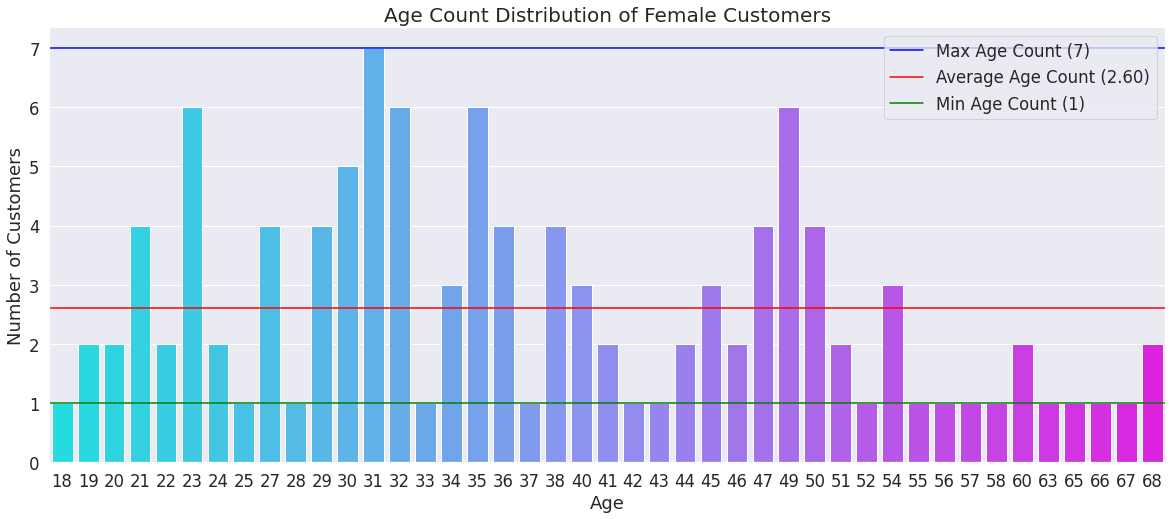

In [21]:
#age count distribution of female customers
maximum = df[df['Gender']=='Female'].Age.value_counts().max()
mean = df[df['Gender']=='Female'].Age.value_counts().mean()
minimum = df[df['Gender']=='Female'].Age.value_counts().min()

fig, f = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
f = sns.countplot(x=df[df['Gender']=='Female'].Age, palette='cool')

f.axhline(y=maximum, linestyle='-',color='blue', label=f'Max Age Count ({maximum})')
f.axhline(y=mean, linestyle='-',color='red', label=f'Average Age Count ({mean:.2f})')
f.axhline(y=minimum, linestyle='-',color='green', label=f'Min Age Count ({minimum})')
f.set_ylabel('Number of Customers')
f.legend()
plt.title('Age Count Distribution of Female Customers', fontsize = 20)
plt.show()

**6. Analysis of Data**

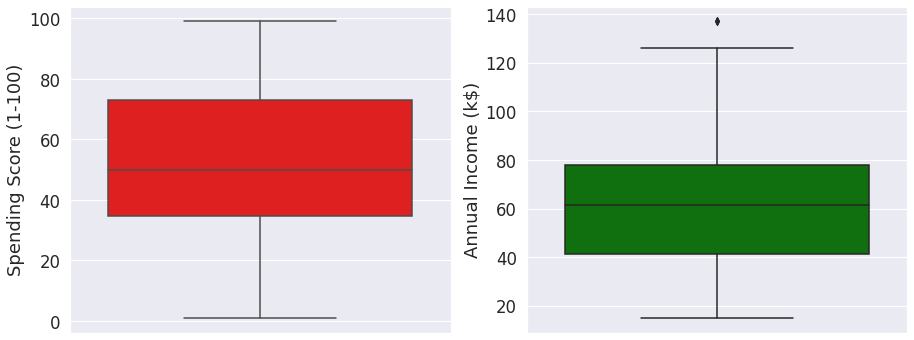

In [22]:
# box plot of Spending Score and Annual Income to visualize the distribution range
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"], color="green")
plt.show()

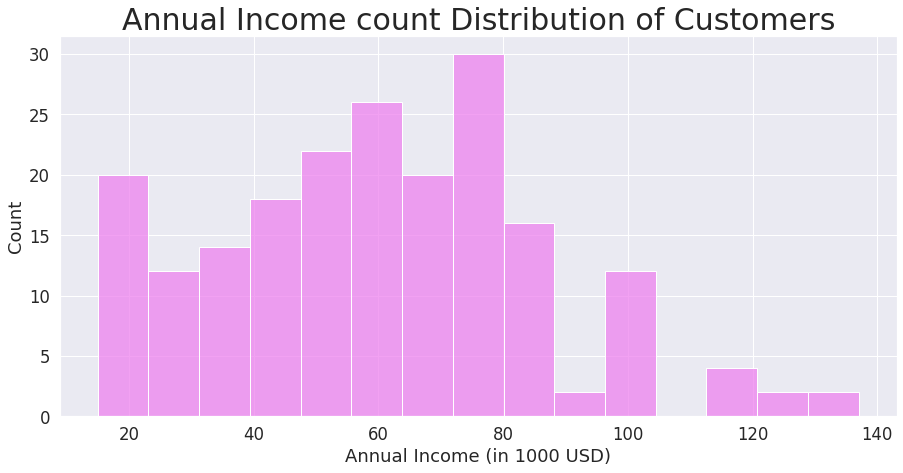

In [23]:
#number of customers count based on annual income distribution
fig, ai = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ai = sns.histplot(df['Annual Income (k$)'], bins=15, ax=ai, color=['violet'])
ai.set_xlabel('Annual Income (in 1000 USD)')
ai.set_ylabel('Count')
plt.title('Annual Income count Distribution of Customers', fontsize = 30)
plt.show()

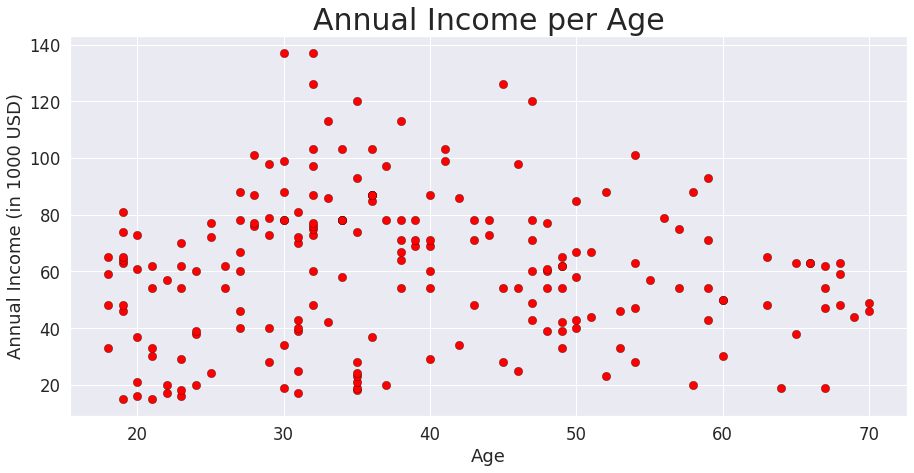

In [24]:
#annual income per age on a scatterplot
fig, aa = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
aa = sns.scatterplot(y=df['Annual Income (k$)'], x=df['Age'], color='red', s=70,edgecolor='black', linewidth=0.3)
aa.set_ylabel('Annual Income (in 1000 USD)')

plt.title('Annual Income per Age', fontsize = 30)
plt.show()

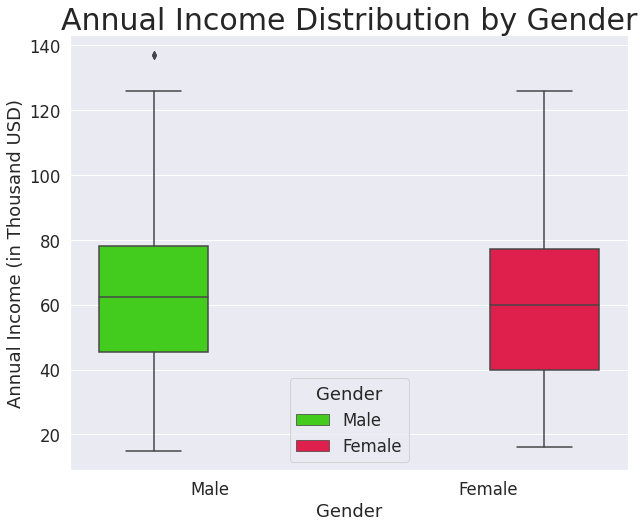

In [25]:
#annual income as per gender on box plot
fig, ag = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ag = sns.boxplot(x=df['Gender'], y=df["Annual Income (k$)"], hue=df['Gender'], palette='prism')
ag.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 30)
plt.show()

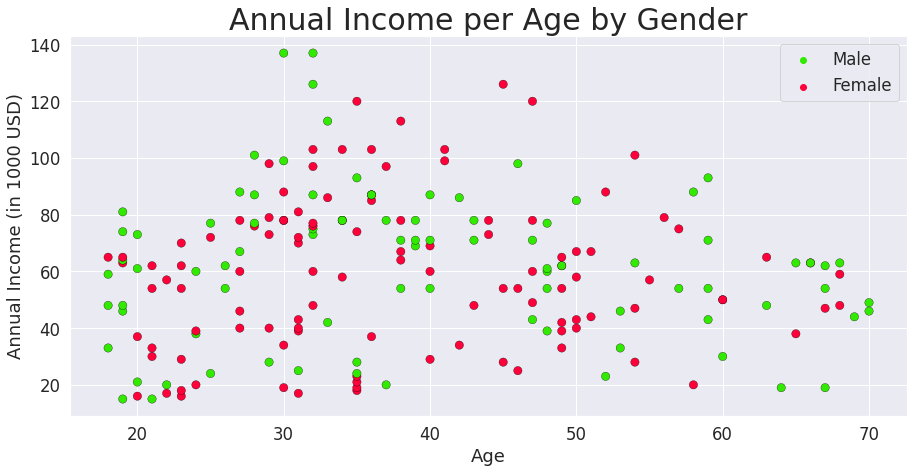

In [26]:
#annual income as per age by gender on scatterplot
fig, aag = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
aag = sns.scatterplot(y=df['Annual Income (k$)'], x=df['Age'], hue=df['Gender'], palette='prism', s=70,edgecolor='black', linewidth=0.3)
aag.set_ylabel('Annual Income (in 1000 USD)')
aag.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 30)
plt.show()

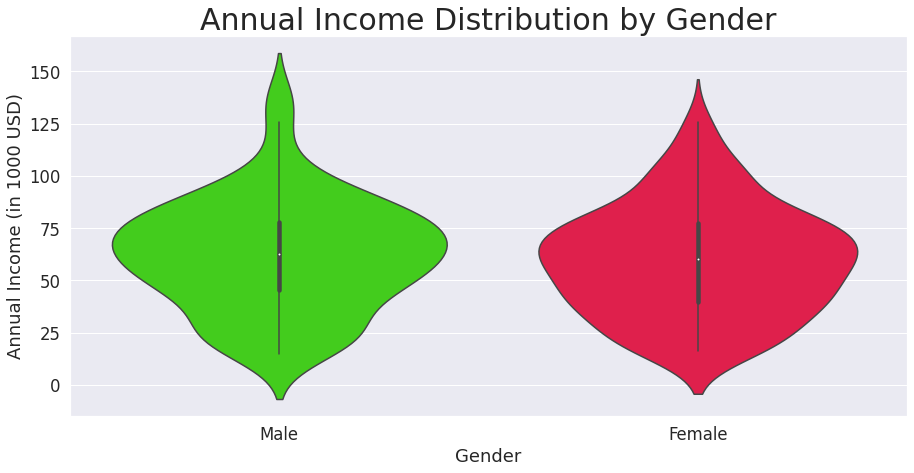

In [27]:
#annual income between male and female customers using violin plot
fig, ag = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ag = sns.violinplot(y=df['Annual Income (k$)'], x=df['Gender'], palette='prism')
ag.set_ylabel('Annual Income (in 1000 USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 30)
plt.show()

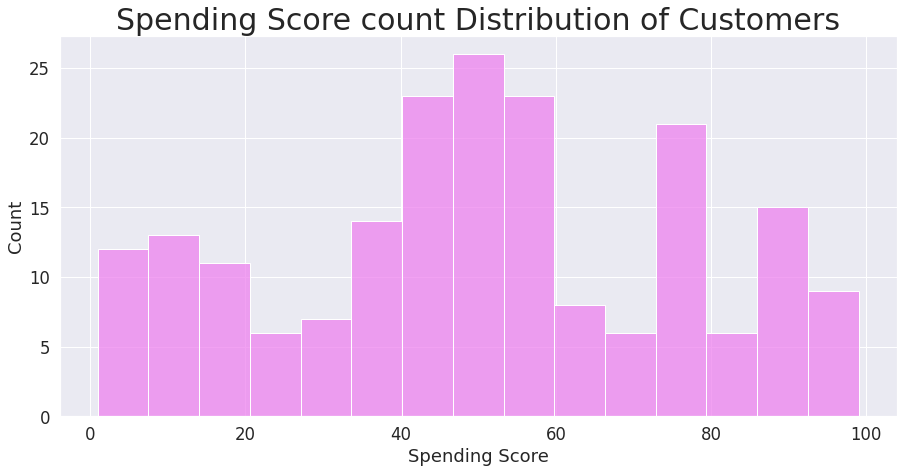

In [28]:
#number of customers counts based on annual income distribution
fig, sc = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
sc = sns.histplot(df['Spending Score (1-100)'], bins=15, ax=sc, color=['violet'])
sc.set_xlabel('Spending Score')
sc.set_ylabel('Count')
plt.title('Spending Score count Distribution of Customers', fontsize = 30)
plt.show()

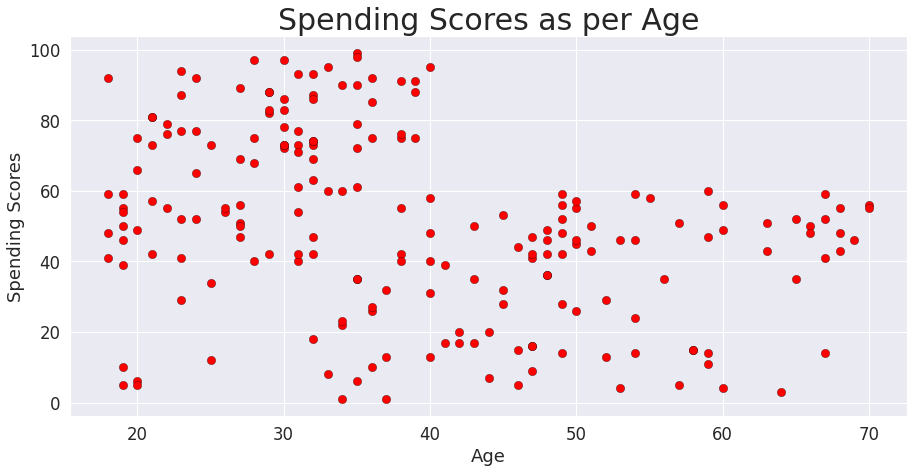

In [29]:
#spending score as per age using scatterplot
fig, sa = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
sa = sns.scatterplot(y=df['Spending Score (1-100)'], x=df['Age'], s=70, color='red', edgecolor='black', linewidth=0.3)
sa.set_ylabel('Spending Scores')

plt.title('Spending Scores as per Age', fontsize = 30)
plt.show()

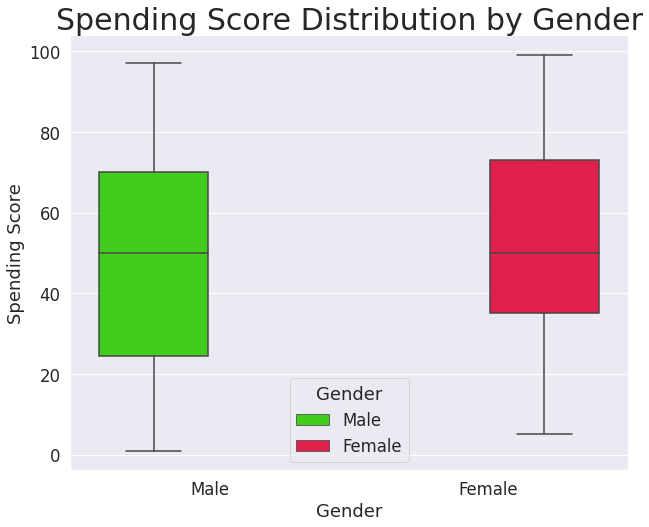

In [30]:
#spending score as per gender on box plot
fig, sg = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
sg = sns.boxplot(x=df['Gender'], y=df["Spending Score (1-100)"], hue=df['Gender'], palette='prism')
sg.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 30)
plt.show()

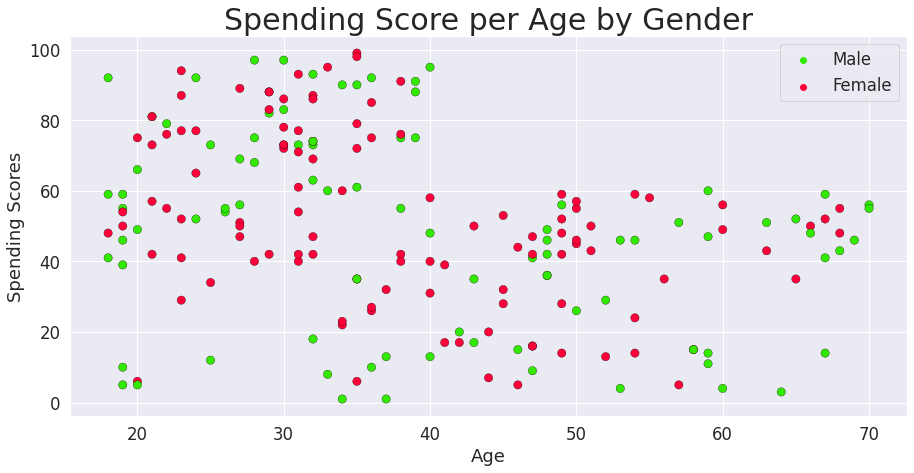

In [31]:
#spending score as per age by gender on scatterplot
fig, sag = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
sag = sns.scatterplot(y=df['Spending Score (1-100)'], x=df['Age'], hue=df['Gender'], palette='prism', s=70,edgecolor='black', linewidth=0.3)
sag.set_ylabel('Spending Scores')
sag.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 30)
plt.show()

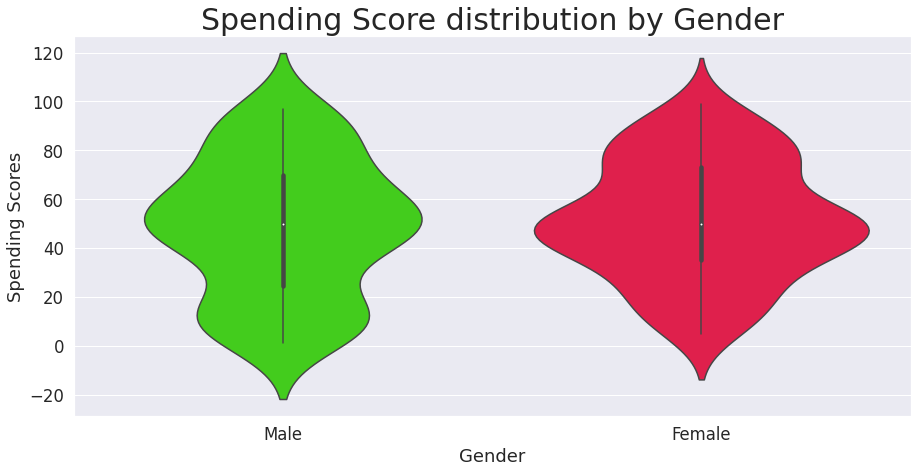

In [32]:
#spending score between male and female customers using violin plot
fig, sg = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
sg = sns.violinplot(y=df['Spending Score (1-100)'],x=df['Gender'], palette='prism')
sg.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 30)
plt.show()

**Spending Score per Annual Income**

In [68]:
clustering_data = df.iloc[:,[2,3]]

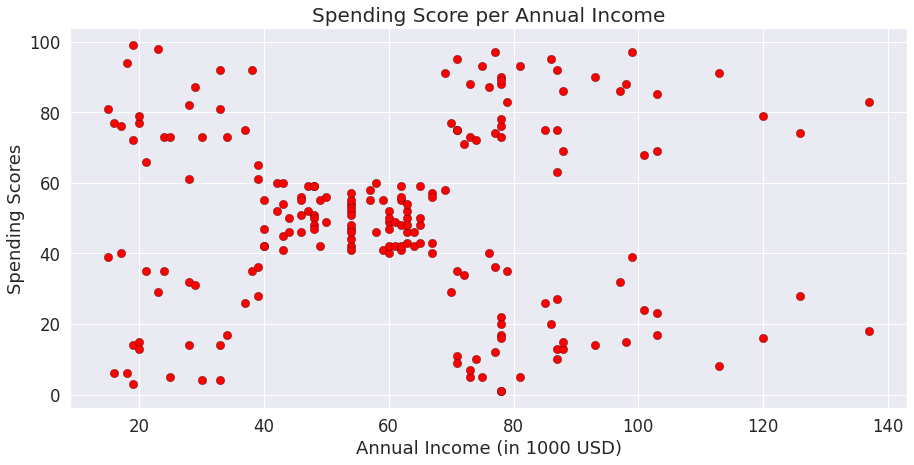

In [75]:
fig, ssai = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ssai = sns.scatterplot(y=clustering_data['Spending Score (1-100)'],x=clustering_data['Annual Income (k$)'], s=70, color='red', edgecolor='black', linewidth=0.3)
ssai.set_ylabel('Spending Scores')
ssai.set_xlabel('Annual Income (in 1000 USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

**7. Clustering**

Determining the number of optimal clusters using the Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
In the Elbow method, we are actually varying the number of clusters(k) from 1–10. For each value of k, we are calculating WCSS(Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster.

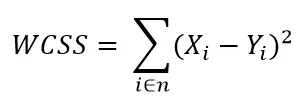

When we plot the WCSS with the k value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when k = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The k value corresponding to this point is the optimal k value or an optimal number of clusters.

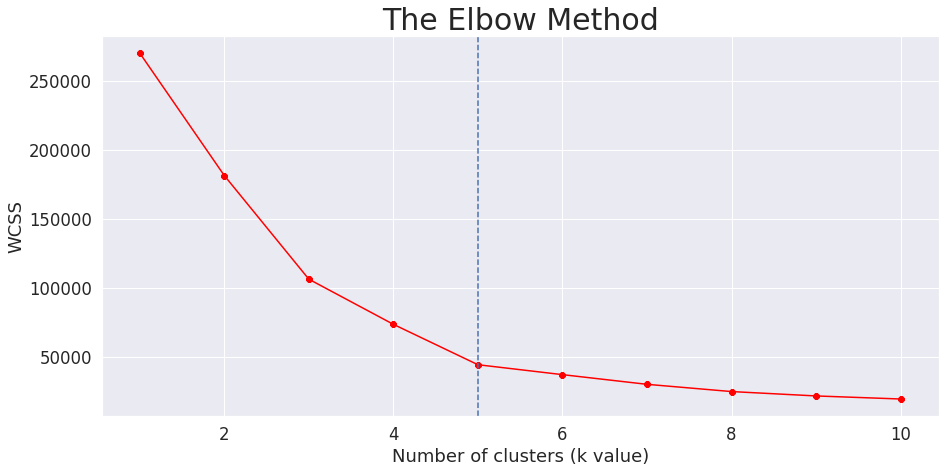

In [82]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,7)) 
plt.plot(range(1, 11), wcss, marker='8', color='red')
plt.axvline(x=5, ls='--')
plt.title('The Elbow Method', fontsize=30)
plt.xlabel('Number of clusters (k value)')
plt.ylabel('WCSS')
plt.show()

Therefore in the plot, the elbow is at k=5 indicating the number of optimal clusters k is 5. Now we plot the data using scatterplot and observe the clusters in different colors.

In [77]:
km = KMeans(n_clusters=5, init='k-means++')
km.fit(clustering_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustering_data)
clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0


In [87]:
kmeans.cluster_centers_

array([[ 82.38888889,  90.44444444],
       [ 47.86046512,  51.97674419],
       [ 63.95238095,  46.21428571],
       [ 80.18181818,  12.68181818],
       [ 24.58333333,   9.58333333],
       [ 25.0952381 ,  80.04761905],
       [114.71428571,  78.42857143],
       [109.7       ,  22.        ],
       [ 77.78571429,  73.28571429],
       [ 28.18181818,  33.27272727]])

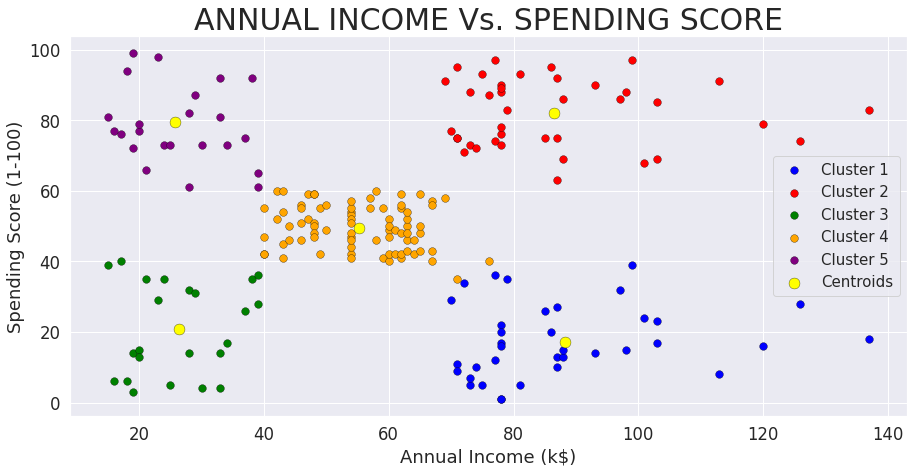

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(df["Annual Income (k$)"][df.label == 0],
           df["Spending Score (1-100)"][df.label == 0],
           c='blue', s=60,edgecolor='black', linewidth=0.3, label='Cluster 1')
ax.scatter(df["Annual Income (k$)"][df.label == 1],
           df["Spending Score (1-100)"][df.label == 1],
           c='red', s=60,edgecolor='black', linewidth=0.3, label='Cluster 2')
ax.scatter(df["Annual Income (k$)"][df.label == 2],
           df["Spending Score (1-100)"][df.label == 2],
           c='green', s=60,edgecolor='black', linewidth=0.3, label='Cluster 3')
ax.scatter(df["Annual Income (k$)"][df.label == 3],
           df["Spending Score (1-100)"][df.label == 3],
           c='orange', s=60,edgecolor='black', linewidth=0.3, label='Cluster 4')
ax.scatter(df["Annual Income (k$)"][df.label == 4],
           df["Spending Score (1-100)"][df.label == 4],
           c='purple', s=60,edgecolor='black', linewidth=0.3, label='Cluster 5')
plt.scatter(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s = 120,
            c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.title("ANNUAL INCOME Vs. SPENDING SCORE", fontsize=30)
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='right', fontsize=15)
plt.show()

**8. Analyzing the customers**

From the above scatterplot, we can see that there are 5 types of customers segregated based on their Annual Income and Spending Score. Let us visualize the clusters by considering each cluster seperately.

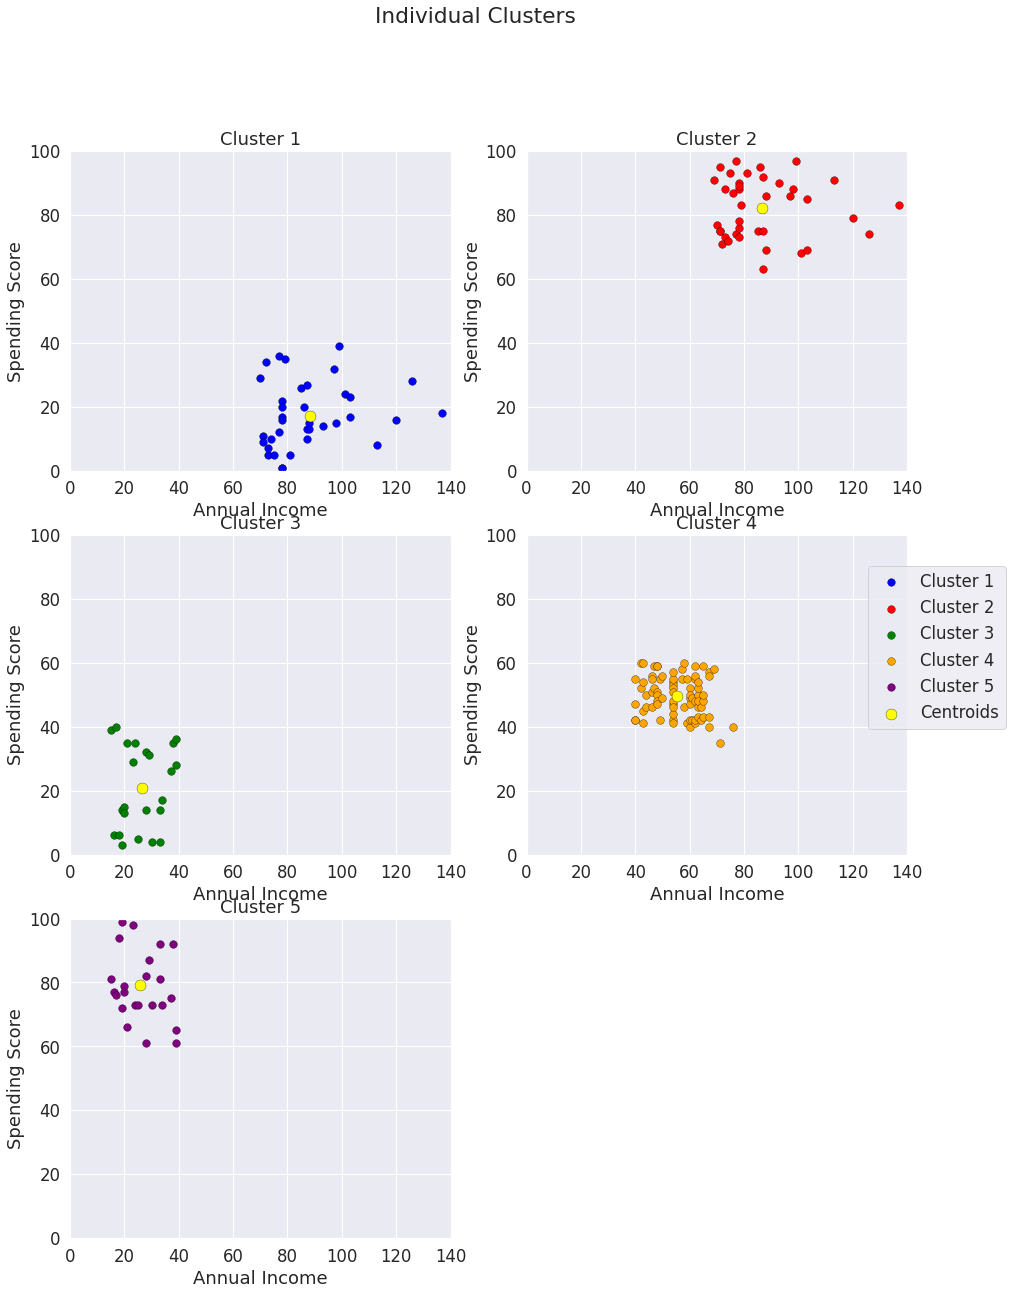

In [106]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(df["Annual Income (k$)"][df.label == 0],
                df["Spending Score (1-100)"][df.label == 0],
                c='blue', s=60,edgecolor='black', linewidth=0.3, label='Cluster 1')
ax[0,0].scatter(km.cluster_centers_[2,0], km.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(df["Annual Income (k$)"][df.label == 1],
                df["Spending Score (1-100)"][df.label == 1],
                c='red', s=60,edgecolor='black', linewidth=0.3, label='Cluster 2')
ax[0,1].scatter(x=km.cluster_centers_[3,0], y=km.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(df["Annual Income (k$)"][df.label == 2],
                df["Spending Score (1-100)"][df.label == 2],
                c='green', s=60,edgecolor='black', linewidth=0.3, label='Cluster 3')
ax[1,0].scatter(x=km.cluster_centers_[0,0], y=km.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(df["Annual Income (k$)"][df.label == 3],
                df["Spending Score (1-100)"][df.label == 3],
                c='orange', s=60,edgecolor='black', linewidth=0.3, label='Cluster 4')
ax[1,1].scatter(x=km.cluster_centers_[4,0], y=km.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(df["Annual Income (k$)"][df.label == 4],
                df["Spending Score (1-100)"][df.label == 4],
                c='purple', s=60,edgecolor='black', linewidth=0.3, label='Cluster 5')
ax[2,0].scatter(x=km.cluster_centers_[1,0], y=km.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

Cluster 1: These customers earn high Annual income but spend less. They should be the prime target for the mall to attract them in spending.

Cluster 2: These customers earn more as well as spend more they are the target customers and regular to the mall.

Cluster 3: These customers have low income and low spending score. They need not be the target customers.

Cluster 4: These customers are average in terms of spending and earning. They are not prime target but can be considered.

Cluster 5: These customers have low income but high spending score. They can also be a potential target.